In [42]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline
pd.options.display.mpl_style = 'default'

### 1. Import and clean up:

In [3]:
"""
=========================================
Dataset characteristics
=========================================	
Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv
	
	- instant: record index
	- dteday : date
	- season : season (1:springer, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2011, 1:2012)
	- mnth : month ( 1 to 12)
	- hr : hour (0 to 23)
	- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
	- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
	- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
	- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
	- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
	- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
	- hum: Normalized humidity. The values are divided to 100 (max)
	- windspeed: Normalized wind speed. The values are divided to 67 (max)
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered
"""
file_url = "../../../DAT_20_NYC/Data/bikeshare.csv"
#names = ['instant','dteday','season','yr','mnth','hr','holiday','weekday',
#         'workingday','weathersit','temp','atemp','hum','windspeed','casual','registered','cnt']
data = pd.read_csv(file_url, delimiter=',', header=0).dropna()
# string interpolation with %i
print "Number of rows: %i" % data.shape[0]
data.head()  # print the first 5 rows

Number of rows: 17379


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0,0,1,1


In [4]:
# split the day out into its own column for aggregation

data['day'] = [date[-2:] for date in data['dteday']]

#get rid of the 'instant' column, and move the day after the mnth for readability
data = data[['dteday','season','yr','mnth','day','hr','holiday','weekday','workingday','weathersit','temp','atemp','hum','windspeed','casual','registered','cnt']]


###2. Some summary statistics and plots:

Sun    444027
Mon    455503
Tue    469109
Wed    473048
Thu    485395
Fri    487790
Sat    477807
Name: cnt, dtype: int64


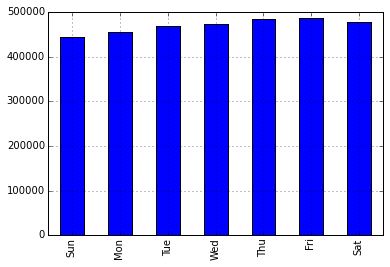

In [5]:
#ridership per day of the week: 
ridership_by_day = data.groupby('weekday').cnt.sum()
labels = ['Sun','Mon','Tue','Wed','Thu','Fri','Sat']
ridership_by_day.index = labels
ridership_by_day.plot(kind='bar')
print ridership_by_day

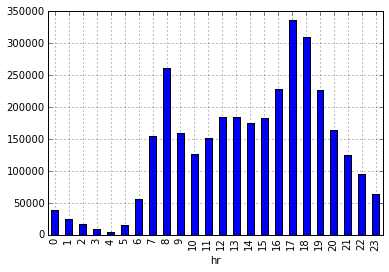

In [6]:
#plot ridership by hour

ridership_by_hour = data.groupby('hr').cnt.sum()
ridership_by_hour.plot(kind='bar')

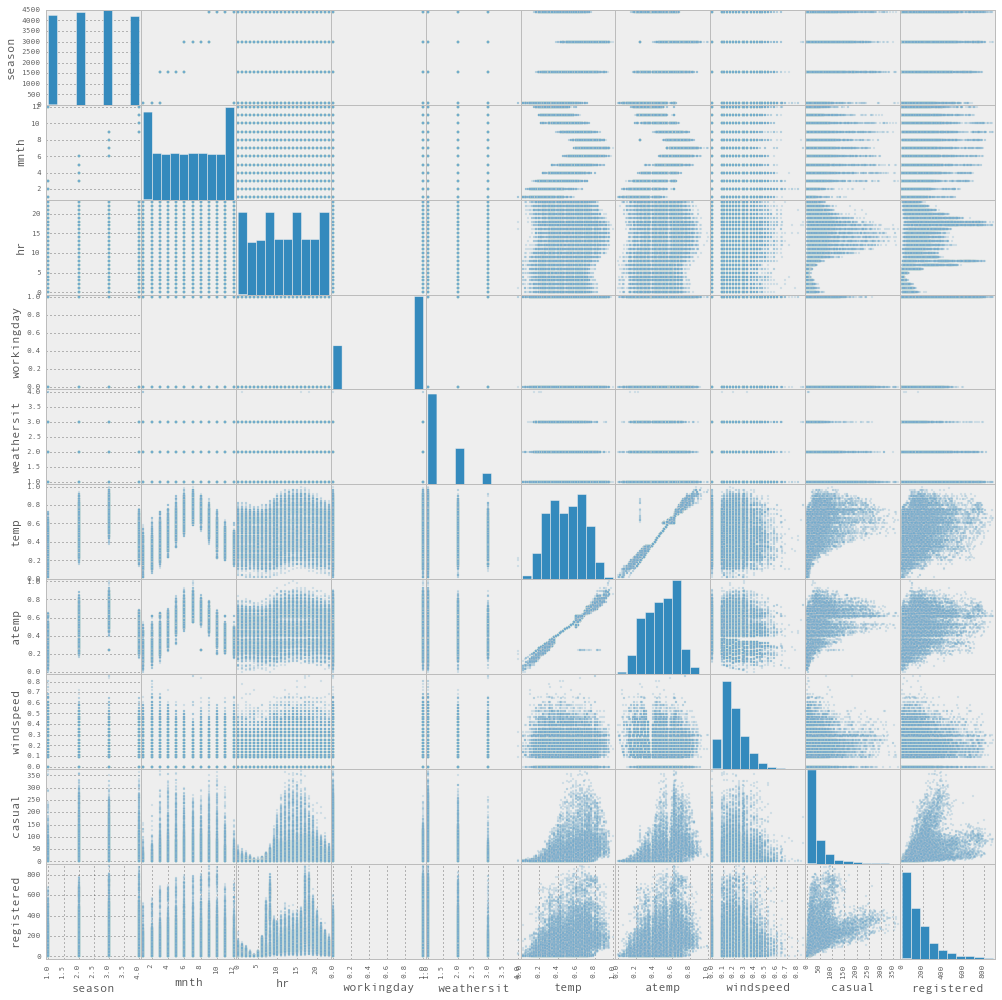

In [60]:
#quickly visualize all the features to look for correlation 
# (edited down to make the scatter matrix load a little faster)
features=['season','mnth','hr','workingday','weathersit','temp','atemp','windspeed','casual','registered']
pd.scatter_matrix(data[features], alpha=0.2, figsize=(17, 17));

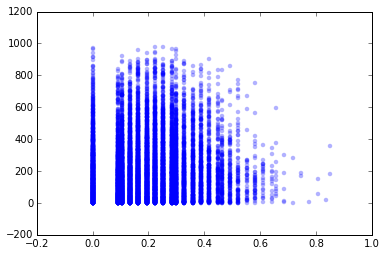

In [8]:
# Windspeed, atemp, temp, and weathersit all look like good indicators for both casual and registered ridership. 
# Windspeed:
plt.scatter(data.windspeed, data.cnt, alpha=0.3, lw=0)

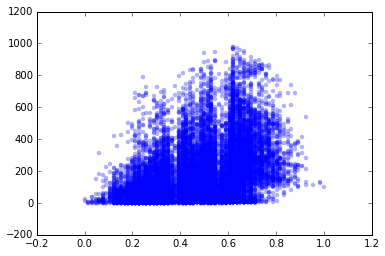

In [9]:
# atemp:
plt.scatter(data.atemp, data.cnt, alpha=0.3, lw=0)

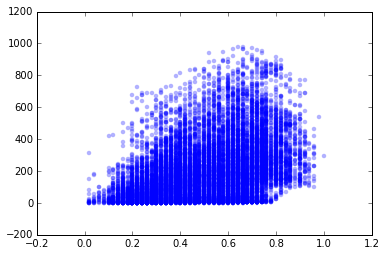

In [10]:
# temp:
plt.scatter(data.temp, data.cnt, alpha=0.3, lw=0)

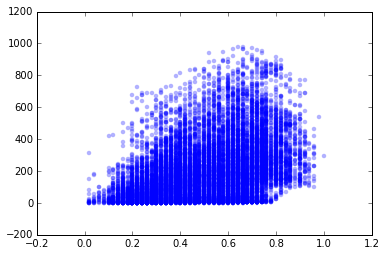

In [11]:
# weathersit:
plt.scatter(data.temp, data.cnt, alpha=0.3, lw=0)

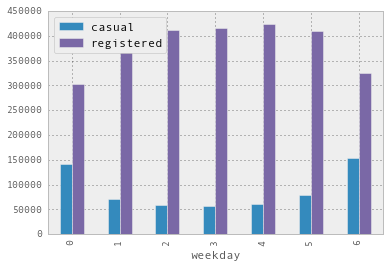

In [50]:
# workingday/weekday have inverse relationships with registered and casual ridership: 
casual = data.groupby('weekday').casual.sum()
registered = data.groupby('weekday').registered.sum()
weekday = pd.concat([casual, registered], axis=1)
weekday.plot(kind='bar')

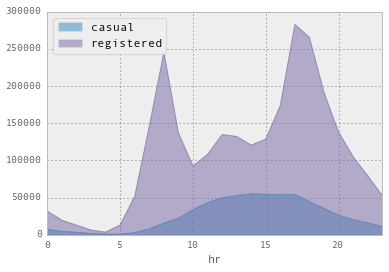

In [57]:
# rush hour has less impact on casual ridership
     
casual = data.groupby('hr').casual.sum()
registered = data.groupby('hr').registered.sum()
hr = pd.concat([casual, registered], axis=1)
hr.plot(kind='area', stacked=False)